In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Step 1: Load the Iris dataset
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [21]:
# Step 2: Multiclass Logistic Regression ( using all 3 classes )
multi_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 200)
multi_model.fit(X, y)
y_pred_multi = multi_model.predict(X)

C:\Users\SWARNABHA\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
# Step 3: Evaluate Multiclass Model
print ("=== Multiclass Logistic Regression ===")
print ( f" Accuracy : { accuracy_score (y, y_pred_multi ) * 100:.2f}%")
print (" Classification Report :")
print ( classification_report (y , y_pred_multi) )

=== Multiclass Logistic Regression ===
 Accuracy : 97.33%
 Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



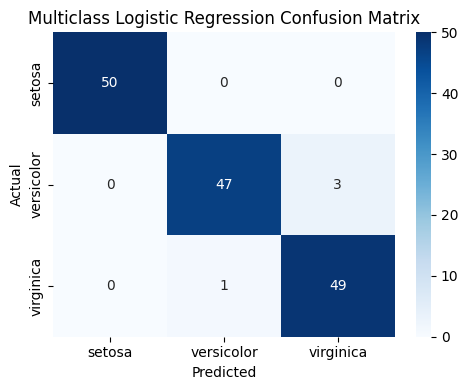

In [24]:
classes = np.unique(y)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_multi, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.title("Multiclass Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("iris_multiclass_confusion.png")
plt.show()

In [28]:
# Step 5: Binary Logistic Regression ( only class 0 vs 1)
# Filter only setosa and versicolor
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_encoded = le.fit_transform(y)

binary_filter = y_encoded < 2
X_binary = X [ binary_filter ]
y_binary = y [ binary_filter ]
binary_model = LogisticRegression (solver ='liblinear')
binary_model . fit ( X_binary , y_binary )
y_pred_binary = binary_model . predict ( X_binary )

In [35]:
# Step 6: Evaluate Binary Model
print ("\n=== Binary Logistic Regression ( Setosa vs Versicolor ) ===")
print (f" Accuracy : { accuracy_score ( y_binary , y_pred_binary ) * 100:.2f}%")
print (" Classification Report :")
print ( classification_report ( y_binary , y_pred_binary , target_names = np.unique(y)[:2]) )


=== Binary Logistic Regression ( Setosa vs Versicolor ) ===
 Accuracy : 100.00%
 Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



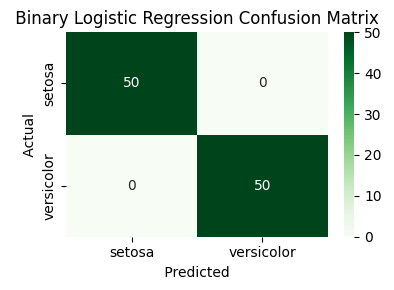

In [39]:
# Step 7: Binary Confusion Matrix
cm_binary = confusion_matrix ( y_binary , y_pred_binary )
plt . figure ( figsize =(4 ,3) )
sns . heatmap ( cm_binary , annot = True , cmap ='Greens', fmt ='d',
xticklabels = np.unique(y) [:2] ,
yticklabels = np.unique(y) [:2])
plt . title (" Binary Logistic Regression Confusion Matrix ")
plt . xlabel (" Predicted ")
plt . ylabel (" Actual ")
plt . tight_layout ()
plt . savefig (" iris_binary_confusion .png")
plt . show ()

In [44]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_binary , y_binary, clf = binary_model, legend = 2)
plt.show()

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>